In [5]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [6]:
env = BlackjackEnv()

In [7]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float) # creates dictionary that returns 0.0 for missing keys
    returns_count = defaultdict(float)
    
    # The final value function
    # we use dicts instead of lists because the each state is a touple = (player_sum, dealer_showing, usable_ace)
    V = defaultdict(float) # init V, stores estimated value for each state
    
    # Implement this!
    for i in range(num_episodes):
        episode = [] # list for storing each state in one episode
        state = env.reset() # resetting env at start of each ep

        done = False
        while not done:
            action = policy(state) # calls policy function that chooses an action for current state
            next_state, reward, done, _ = env.step(action) # go next state, get the reward for our state
            episode.append((state, action, reward)) # append
            state = next_state

        states_in_episode = set([x[0] for x in episode]) # set of unique states visited in the episode 
                                                         # x[0] extract the state from (state, action, reward) touple
        for state in states_in_episode:
            first_occurence_idx = next(i for i, x in enumerate(episode) if x[0] == state) # next goes through our episode,
                                                                                          # find the first index of the current state we observing
            # G return
            G = sum([reward * (discount_factor ** i) for i, (_, _, reward) in enumerate(episode[first_occurence_idx:])])
            # updating returns_sum and returns_count for this state
            returns_sum[state] += G
            returns_count[state] += 1
            # we want the average return for each state, not just the most recent one
            V[state] = returns_sum[state] / returns_count[state]
    
    return V    

In [8]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    # this looks at the touple and decides whether stick or hit action
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

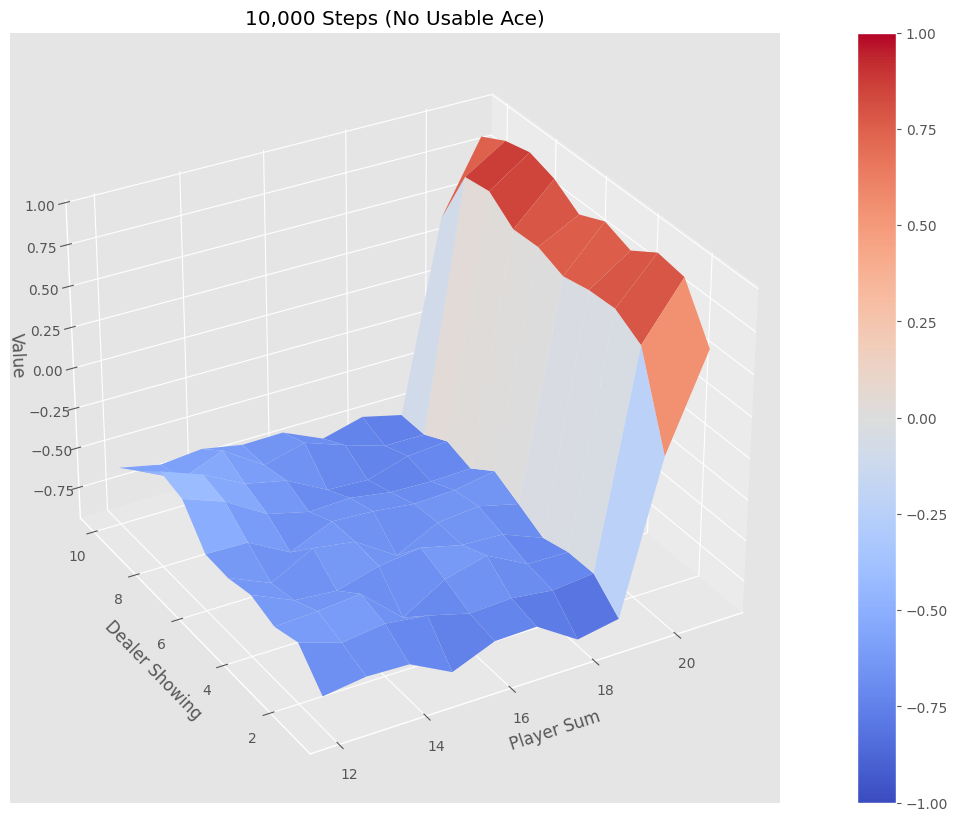

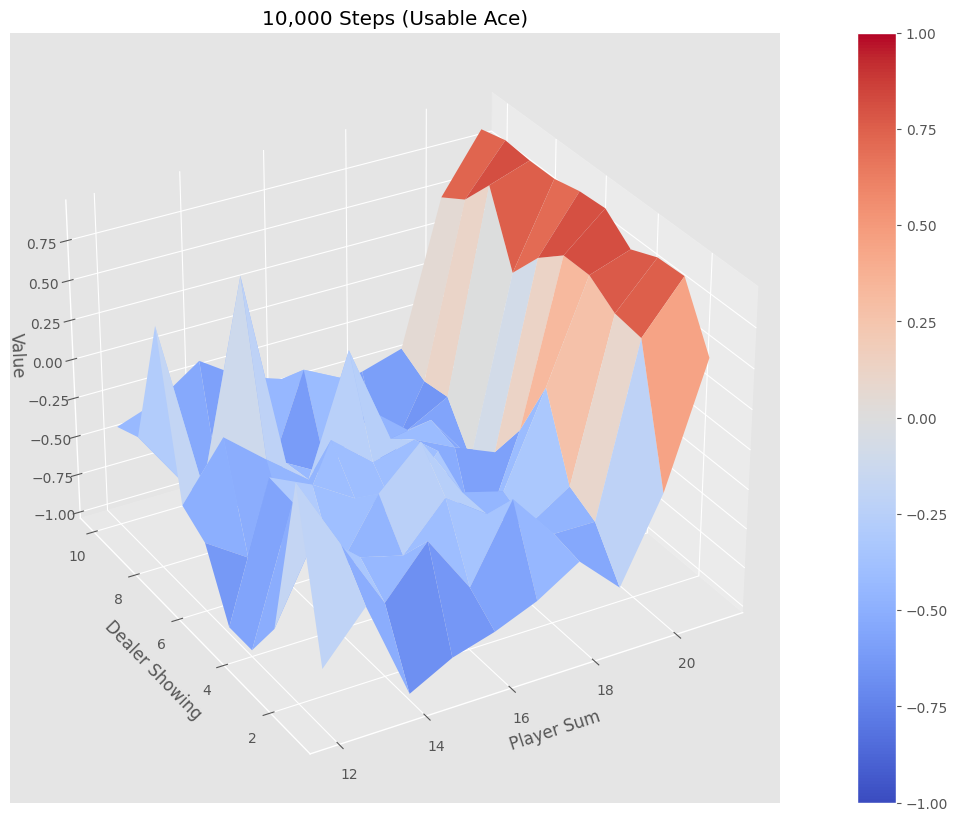

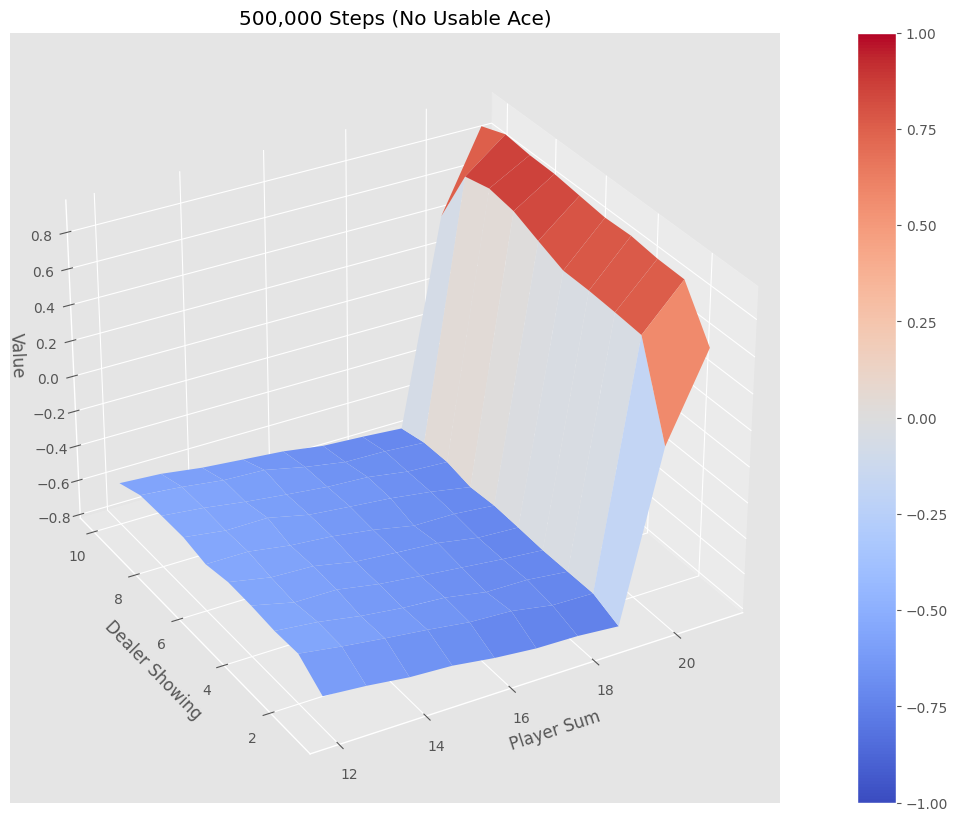

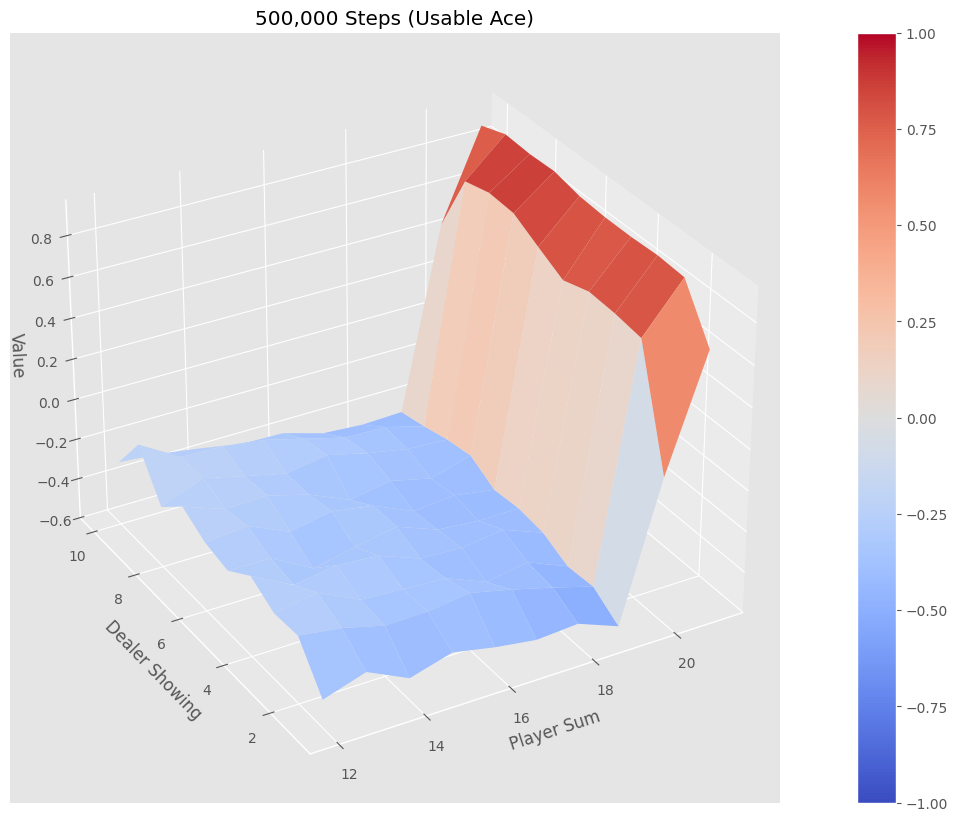

In [9]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")